# Problem 1

In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron

In [2]:
#Training and testing data
x_train = np.array([[1.3, 3.3], [1.4, 2.5], [1.8, 2.8], [1.9, 3.1], [1.5, 1.5], [1.8, 2], [2.3, 1.9], [2.4, 1.4], [2.4, 2.4], [2.4, 3], [2.7, 2.7], [2.3, 3.2]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])


x_test = np.array([[1.7, 2.5], [1.9, 2.7], [2, 2.15], [2.4, 2], [2.2, 3.25], [2.4, 2.25]])
y_test = np.array([0, 0, 1, 1, 2, 2])

In [3]:
#Define a function to plot confusion matrices
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [4]:
#Define a function to plot decision surfaces
def plot_decision_surface(estimator, X_train, y_train, X_test, y_test,name):
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    colors = ['blue', 'red', 'orange']
    color_map = ListedColormap(colors)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map, edgecolor='k', s=50, marker='o', label='Training Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_map, edgecolor='k', s=50, marker='*', label='Testing Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.tight_layout()
    plt.title(name)
    plt.show()

In [5]:
#Define a function to plot decision surfaces for aggregated one vs rest
def plot_decision_surface_ag(models, X_train, y_train, X_test, y_test,name):
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min , x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    outputs = []
    for model in models:
        pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
        outputs.append(pred)
    z_agregated = np.argmax(outputs, axis=0)
    Z = z_agregated.reshape(xx.shape)
    
    colors = ['blue', 'red', 'orange']
    color_map = ListedColormap(colors)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=color_map)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map, edgecolor='k', s=50, marker='o', label='Training Data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=color_map, edgecolor='k', s=50, marker='*', label='Testing Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.tight_layout()
    plt.title(name)
    plt.show()

In [6]:
#Default SVM classifier
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

Accuracy for train set: 100.0 %
Accuracy for test set: 100.0 %


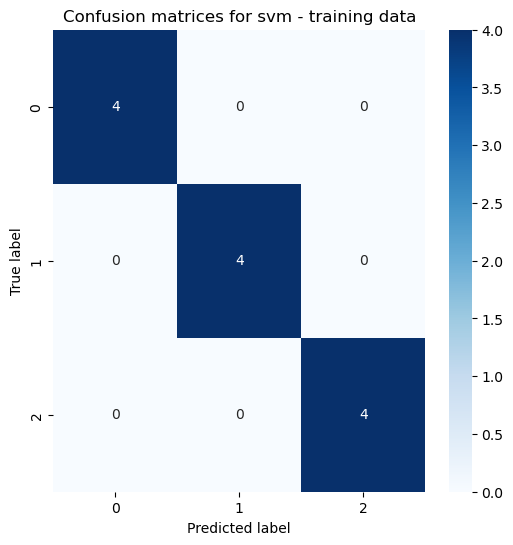

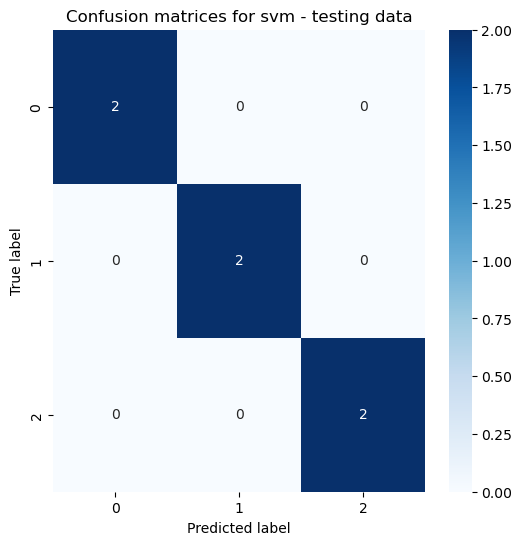

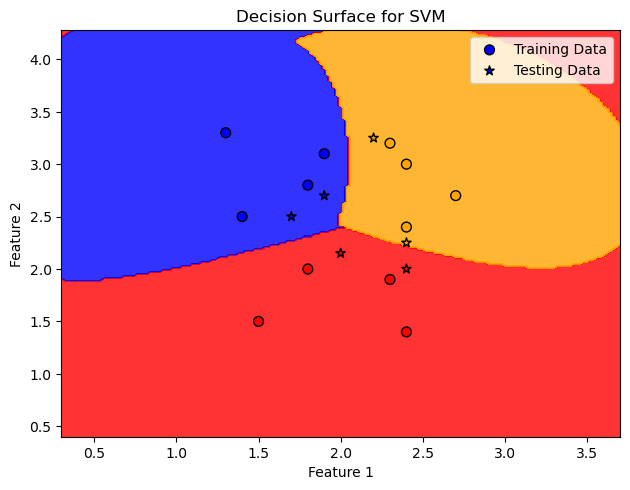

In [7]:
#print the accurcy for SVM
print("Accuracy for train set:", accuracy_train*100,"%")
print("Accuracy for test set:", accuracy_test*100,"%")

#Confusion matrices for SVM - training data
cm_train = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(cm_train,"Confusion matrices for svm - training data")


#Confusion matrices for SVM - testing data
cm_test = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm_test,"Confusion matrices for svm - testing data")

#Decision Surface for SVM
plot_decision_surface(svm, x_train, y_train, x_test, y_test,"Decision Surface for SVM")

In [8]:
#label training and testing data for one vs rest as binary classifier
y_train_0 = np.where(y_train == 0, 1, 0)
y_train_1 = np.where(y_train == 1, 1, 0)
y_train_2 = np.where(y_train == 2, 1, 0)

y_test_0 = np.where(y_test == 0, 1, 0)
y_test_1 = np.where(y_test == 1, 1, 0)
y_test_2 = np.where(y_test == 2, 1, 0)

In [9]:
#one-vs-rest strategy for SVM
svm0 = SVC(kernel="linear")
svm1 = SVC(kernel="linear")
svm2 = SVC(kernel="linear")


svm0.fit(x_train, y_train_0)
sp_train0= svm0.predict(x_train)
sp_test0= svm0.predict(x_test)
sacc_train0= accuracy_score(y_train_0, sp_train0)
sacc_test0= accuracy_score(y_test_0, sp_test0)
scm_train0=confusion_matrix(y_train_0, sp_train0)
scm_test0=confusion_matrix(y_test_0, sp_test0)

svm1.fit(x_train, y_train_1)
sp_train1= svm1.predict(x_train)
sp_test1= svm1.predict(x_test)
sacc_train1= accuracy_score(y_train_1, sp_train1)
sacc_test1= accuracy_score(y_test_1, sp_test1)
scm_train1=confusion_matrix(y_train_1, sp_train1)
scm_test1=confusion_matrix(y_test_1, sp_test1)

svm2.fit(x_train, y_train_2)
sp_train2= svm2.predict(x_train)
sp_test2= svm2.predict(x_test)
sacc_train2= accuracy_score(y_train_2, sp_train2)
sacc_test2= accuracy_score(y_test_2, sp_test2)
scm_train2=confusion_matrix(y_train_2, sp_train2)
scm_test2=confusion_matrix(y_test_2, sp_test2)

SVM one vs rest - class0 trainig accurcy :  83.33333333333334 %
SVM one vs rest - class0 testing accurcy :  66.66666666666666 %


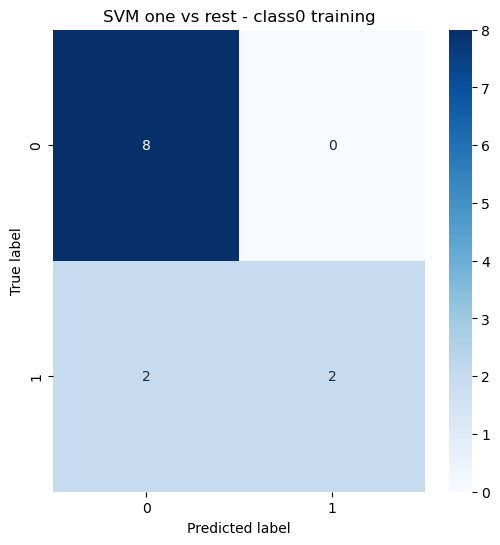

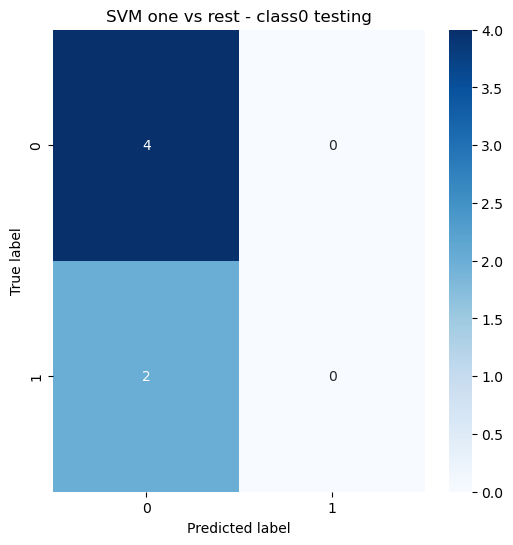

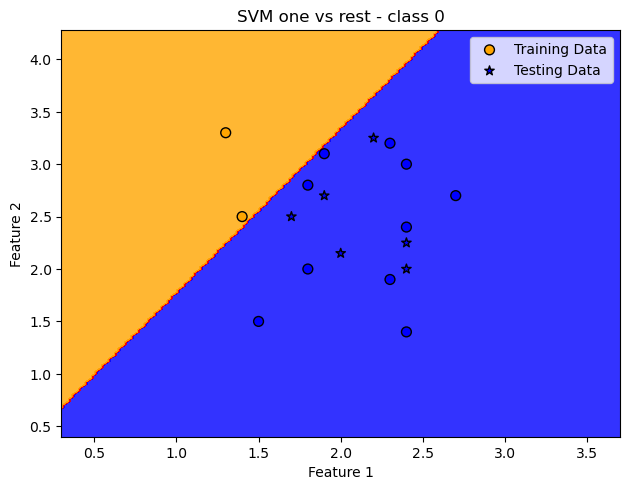

In [10]:
#print the accurcy for SVM one vs rest - class0
print("SVM one vs rest - class0 trainig accurcy : ",sacc_train0*100,"%")
print("SVM one vs rest - class0 testing accurcy : ",sacc_test0*100,"%")

#SVM one vs rest - class0 , draw Confusion matrices for (trainig , testing data) and draw Decision surfaces
plot_confusion_matrix(scm_train0,"SVM one vs rest - class0 training")
plot_confusion_matrix(scm_test0,"SVM one vs rest - class0 testing")
plot_decision_surface(svm0,x_train,sp_train0,x_test,sp_test0,"SVM one vs rest - class 0")

SVM one vs rest - class1 trainig accurcy :  100.0 %
SVM one vs rest - class1 testing accurcy :  83.33333333333334 %


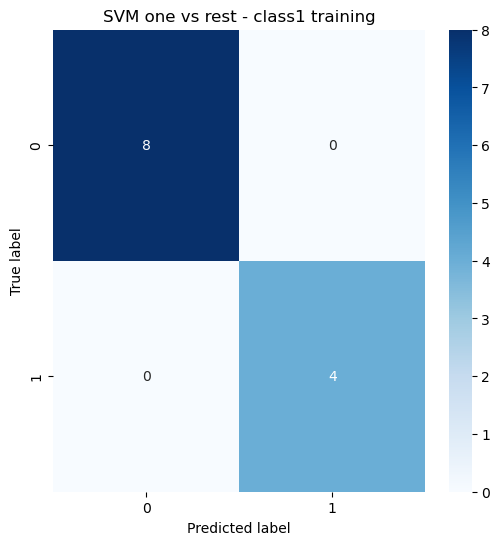

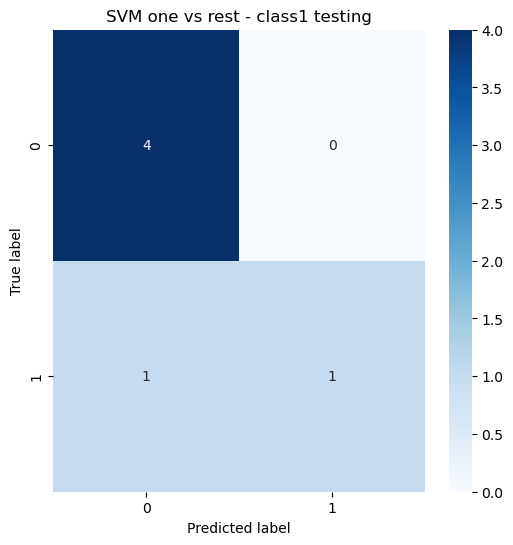

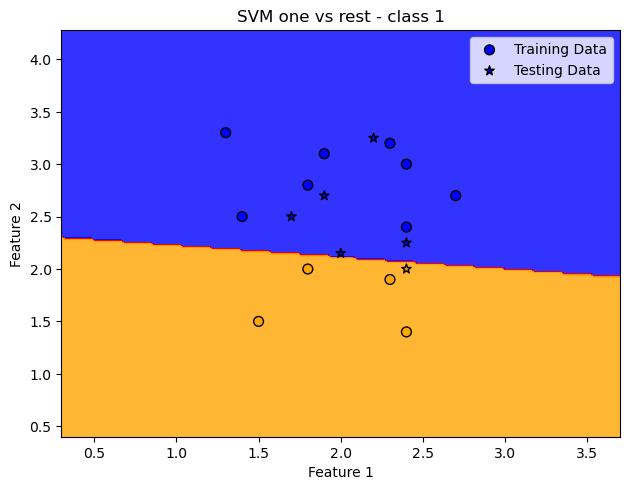

In [11]:
#print the accurcy for SVM one vs rest - class1
print("SVM one vs rest - class1 trainig accurcy : ",sacc_train1*100,"%")
print("SVM one vs rest - class1 testing accurcy : ",sacc_test1*100,"%")

#SVM one vs rest - class1 , draw Confusion matrices for (trainig , testing data) and draw Decision surfaces
plot_confusion_matrix(scm_train1,"SVM one vs rest - class1 training")
plot_confusion_matrix(scm_test1,"SVM one vs rest - class1 testing")
plot_decision_surface(svm1,x_train,sp_train1,x_test,sp_test1,"SVM one vs rest - class 1")

SVM one vs rest - class2 trainig accurcy :  100.0 %
SVM one vs rest - class2 testing accurcy :  83.33333333333334 %


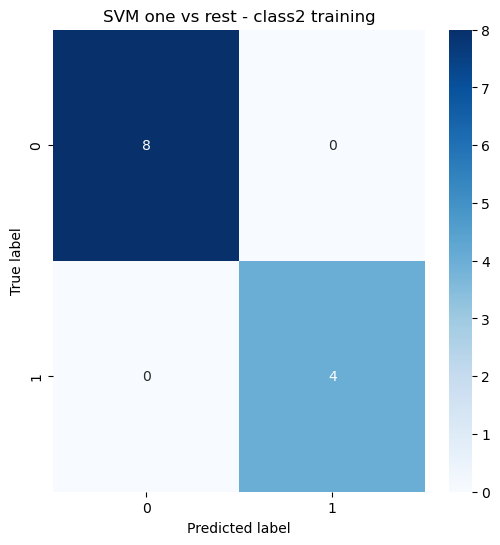

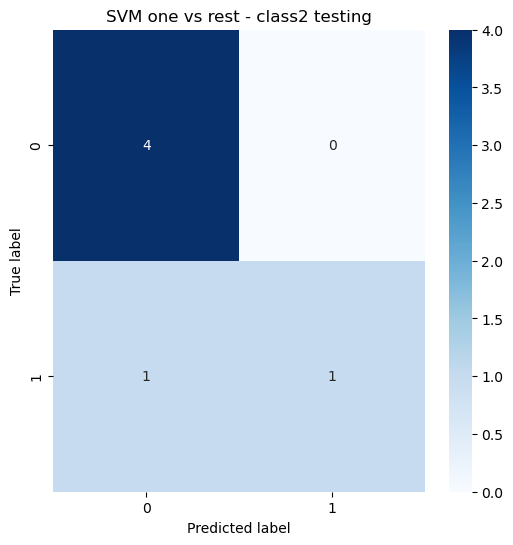

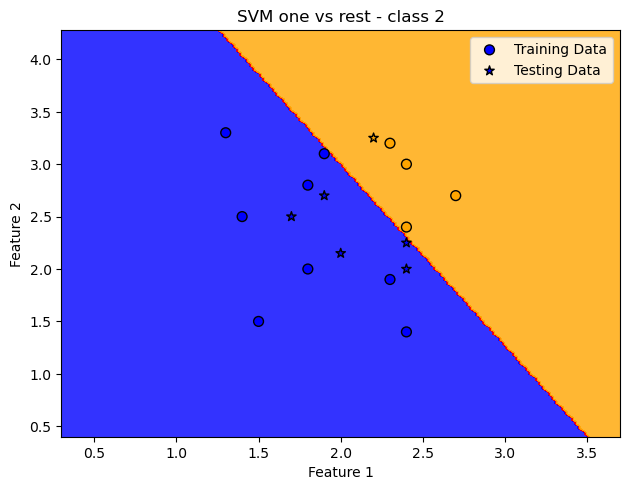

In [12]:
#print the accurcy for SVM one vs rest - class2
print("SVM one vs rest - class2 trainig accurcy : ",sacc_train2*100,"%")
print("SVM one vs rest - class2 testing accurcy : ",sacc_test2*100,"%")

#SVM one vs rest - class2 , draw Confusion matrices for (trainig , testing data) and draw Decision surfaces
plot_confusion_matrix(scm_train2,"SVM one vs rest - class2 training")
plot_confusion_matrix(scm_test2,"SVM one vs rest - class2 testing")
plot_decision_surface(svm2,x_train,sp_train2,x_test,sp_test2,"SVM one vs rest - class 2")

In [13]:
#one-vs-rest strategy for Perceptron
per0=Perceptron()
per1=Perceptron()
per2=Perceptron()

per0.fit(x_train, y_train_0)
pp_train0= per0.predict(x_train)
pp_test0= per0.predict(x_test)
pacc_train0= accuracy_score(y_train_0, pp_train0)
pacc_test0= accuracy_score(y_test_0, pp_test0)
pcm_train0=confusion_matrix(y_train_0, pp_train0)
pcm_test0=confusion_matrix(y_test_0, pp_test0)

per1.fit(x_train, y_train_1)
pp_train1= per1.predict(x_train)
pp_test1= per1.predict(x_test)
pacc_train1= accuracy_score(y_train_1, pp_train1)
pacc_test1= accuracy_score(y_test_1, pp_test1)
pcm_train1=confusion_matrix(y_train_1, pp_train1)
pcm_test1=confusion_matrix(y_test_1, pp_test1)

per2.fit(x_train, y_train_2)
pp_train2= per2.predict(x_train)
pp_test2= per2.predict(x_test)
pacc_train2= accuracy_score(y_train_2, pp_train2)
pacc_test2= accuracy_score(y_test_2, pp_test2)
pcm_train2=confusion_matrix(y_train_2, pp_train2)
pcm_test2=confusion_matrix(y_test_2, pp_test2)

Perceptron one vs rest - class0 trainig accurcy :  100.0 %
Perceptron one vs rest - class0 testing accurcy :  83.33333333333334 %


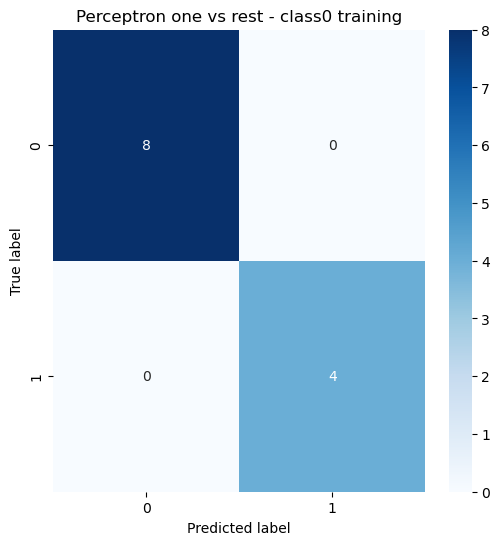

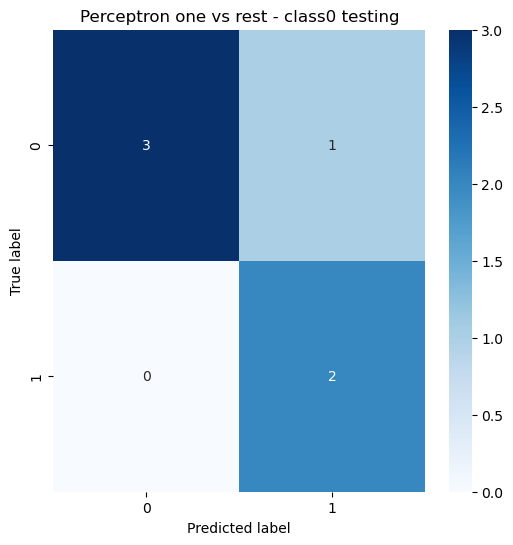

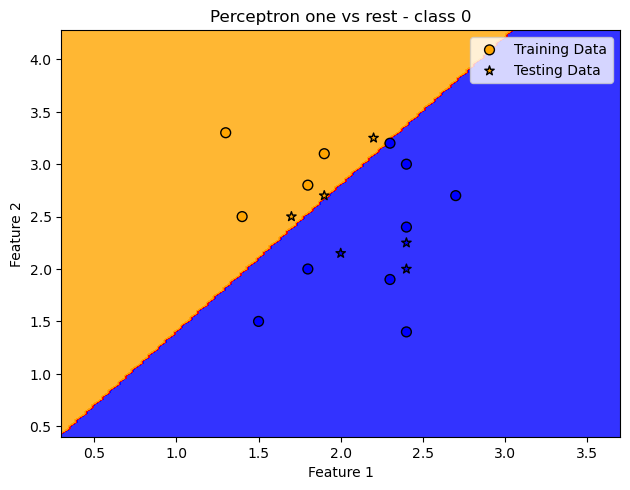

In [14]:
#print the accurcy for Perceptron one vs rest - class0
print("Perceptron one vs rest - class0 trainig accurcy : ",pacc_train0*100,"%")
print("Perceptron one vs rest - class0 testing accurcy : ",pacc_test0*100,"%")

#Perceptron one vs rest - class0 , draw Confusion matrices for (trainig , testing data) and draw Decision surfaces
plot_confusion_matrix(pcm_train0,"Perceptron one vs rest - class0 training")
plot_confusion_matrix(pcm_test0,"Perceptron one vs rest - class0 testing")
plot_decision_surface(per0,x_train,pp_train0,x_test,pp_test0,"Perceptron one vs rest - class 0")

Perceptron one vs rest - class1 trainig accurcy :  91.66666666666666 %
Perceptron one vs rest - class1 testing accurcy :  83.33333333333334 %


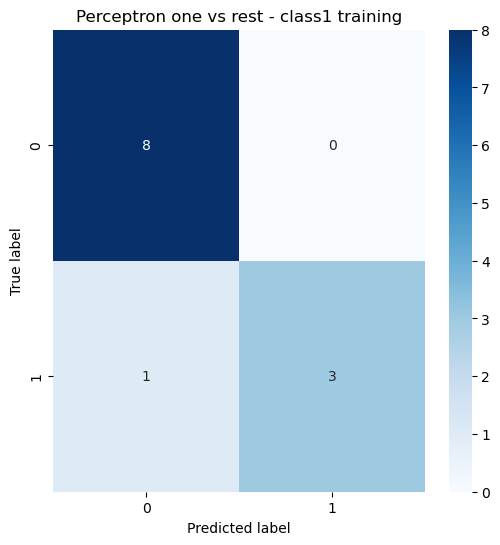

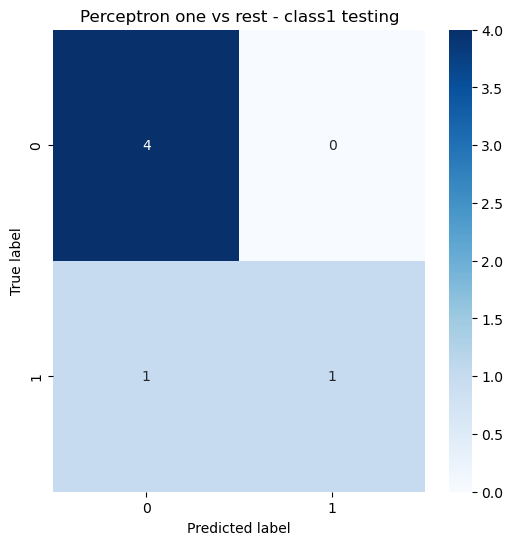

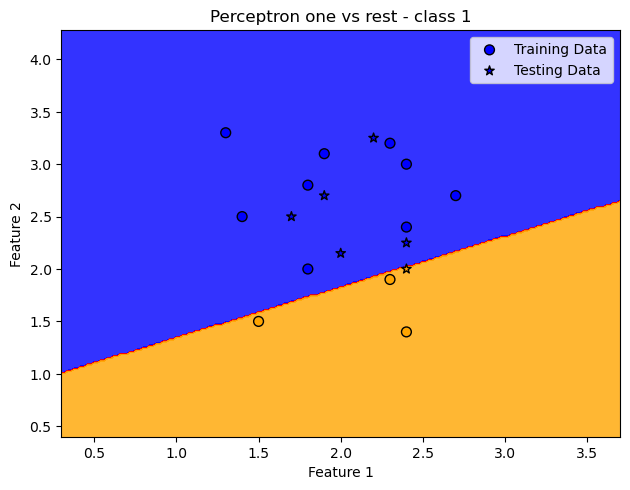

In [15]:
#print the accurcy for Perceptron one vs rest - class1
print("Perceptron one vs rest - class1 trainig accurcy : ",pacc_train1*100,"%")
print("Perceptron one vs rest - class1 testing accurcy : ",pacc_test1*100,"%")

#Perceptron one vs rest - class1 , draw Confusion matrices for (trainig , testing data) and draw Decision surfaces
plot_confusion_matrix(pcm_train1,"Perceptron one vs rest - class1 training")
plot_confusion_matrix(pcm_test1,"Perceptron one vs rest - class1 testing")
plot_decision_surface(per1,x_train,pp_train1,x_test,pp_test1,"Perceptron one vs rest - class 1")

Perceptron one vs rest - class2 trainig accurcy :  33.33333333333333 %
Perceptron one vs rest - class2 testing accurcy :  33.33333333333333 %


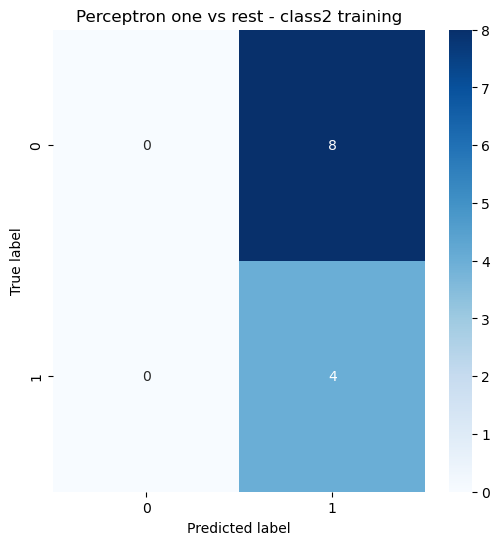

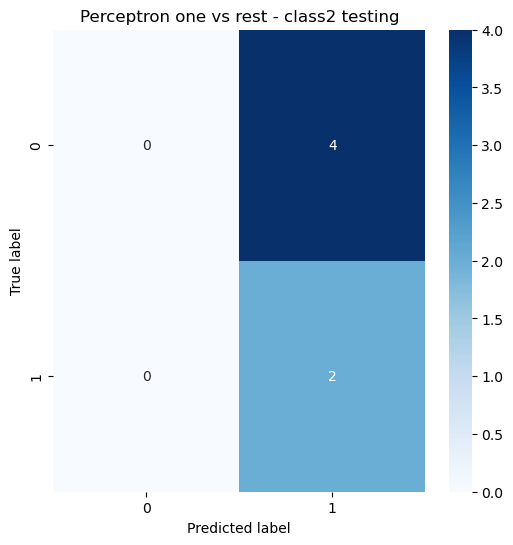

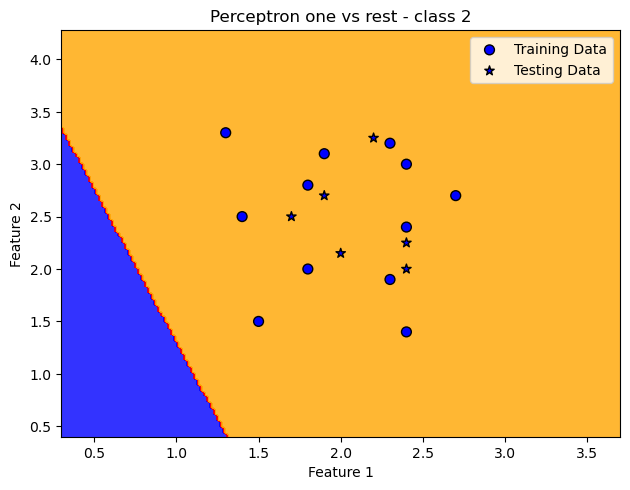

In [16]:
#print the accurcy for Perceptron one vs rest - class2
print("Perceptron one vs rest - class2 trainig accurcy : ",pacc_train2*100,"%")
print("Perceptron one vs rest - class2 testing accurcy : ",pacc_test2*100,"%")

#Perceptron one vs rest - class2 , draw Confusion matrices for (trainig , testing data) and draw Decision surfaces
plot_confusion_matrix(pcm_train2,"Perceptron one vs rest - class2 training")
plot_confusion_matrix(pcm_test2,"Perceptron one vs rest - class2 testing")
plot_decision_surface(per2,x_train,pp_train2,x_test,pp_test2,"Perceptron one vs rest - class 2")

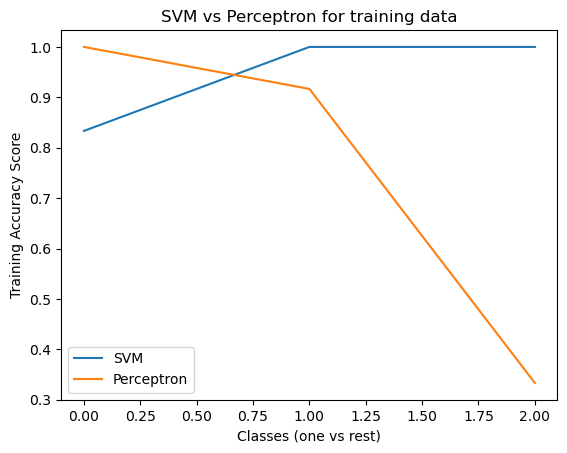

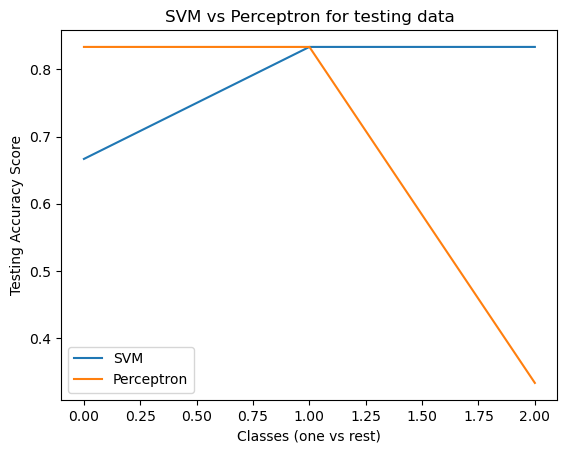

In [17]:
#Compare and analyze SVM and Perceptron results
classes=[0,1,2]
sacc_train_all=[sacc_train0,sacc_train1,sacc_train2]
sacc_test_all=[sacc_test0,sacc_test1,sacc_test2]
pacc_train_all=[pacc_train0,pacc_train1,pacc_train2]
pacc_test_all=[pacc_test0,pacc_test1,pacc_test2]

# Plot the accuracy scores for SVM and Perceptron - training data
plt.plot(classes,sacc_train_all, label='SVM')
plt.plot(classes,pacc_train_all, label='Perceptron')
plt.xlabel('Classes (one vs rest)')
plt.ylabel('Training Accuracy Score')
plt.title('SVM vs Perceptron for training data')
plt.legend()
plt.show()

# Plot the accuracy scores for SVM and perceptron - testing dataset
plt.plot(classes,sacc_test_all, label='SVM')
plt.plot(classes,pacc_test_all, label='Perceptron')
plt.xlabel('Classes (one vs rest)')
plt.ylabel('Testing Accuracy Score')
plt.title('SVM vs Perceptron for testing data')
plt.legend()
plt.show()

In [18]:
#Aggregate results from the one-vs-rest strategy for SVM

#aggregated train data
svm_train = [sp_train0, sp_train1, sp_train2]
svm_train_arg = np.argmax(svm_train, axis=0)
svm_train_all = svm_train_arg.tolist()

#aggregated test data
svm_test = [sp_test0, sp_test1, sp_test2]
svm_test_arg = np.argmax(svm_test, axis=0)
svm_test_all = svm_test_arg.tolist()

aggregated SVM accurcy for training :  100.0 %
aggregated SVM accurcy for testing :  66.66666666666666 %


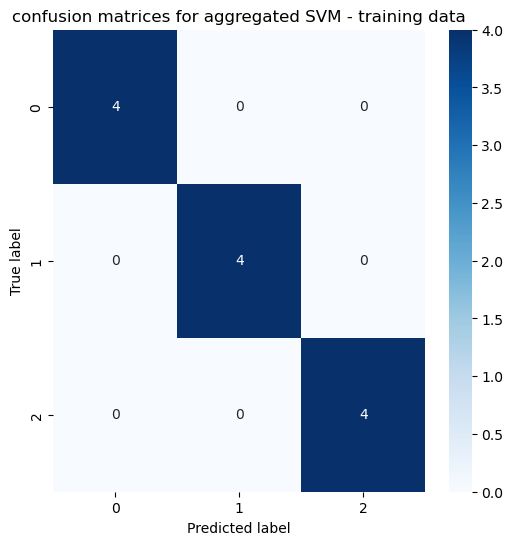

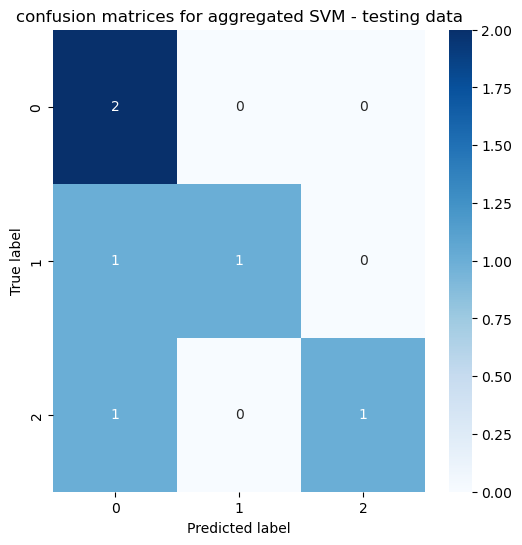

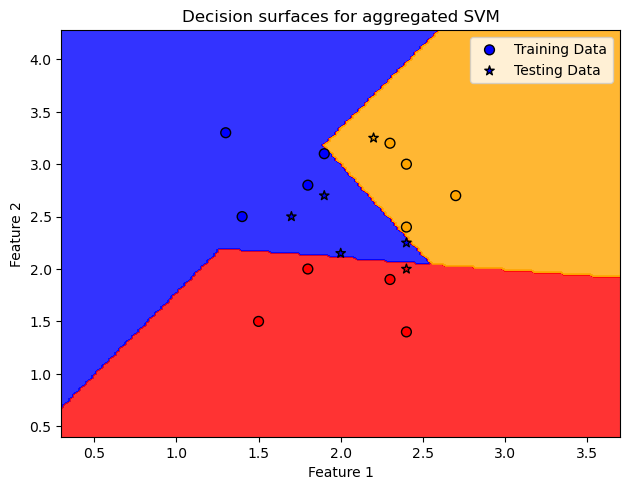

In [19]:
#print the accurcy for aggregated SVM
svm_acc_train= accuracy_score(y_train, svm_train_all)
svm_acc_test= accuracy_score(y_test, svm_test_all)
print("aggregated SVM accurcy for training : ",svm_acc_train*100,"%")
print("aggregated SVM accurcy for testing : ",svm_acc_test*100,"%")

#Confusion matrices for aggregated SVM - training data
s_cm_train=confusion_matrix(y_train, svm_train_all)
plot_confusion_matrix(s_cm_train, "confusion matrices for aggregated SVM - training data")

#Confusion matrices for aggregated SVM - testing data
s_cm_test=confusion_matrix(y_test, svm_test_all)
plot_confusion_matrix(s_cm_test, "confusion matrices for aggregated SVM - testing data")

#Decision surfaces for aggregated SVM
svm_all=[svm0,svm1,svm2]
plot_decision_surface_ag(svm_all, x_train, svm_train_all, x_test, svm_test_all,"Decision surfaces for aggregated SVM")

In [20]:
#Aggregate results from the one-vs-rest strategy for perceptron

#aggregated train data
per_train = [pp_train0, pp_train1, pp_train2]
per_train_arg = np.argmax(per_train, axis=0)
per_train_all = per_train_arg.tolist()

#aggregated test data
per_test = [pp_test0, pp_test1, pp_test2]
per_test_arg = np.argmax(per_test, axis=0)
per_test_all = per_test_arg.tolist()

aggregated SVM accurcy for training :  91.66666666666666 %
aggregated SVM accurcy for testing :  66.66666666666666 %


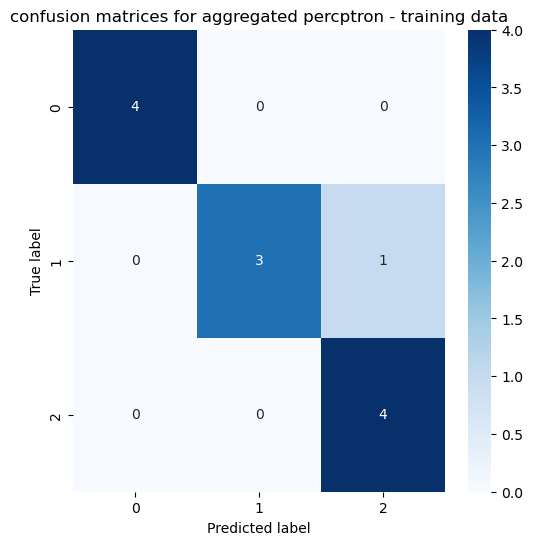

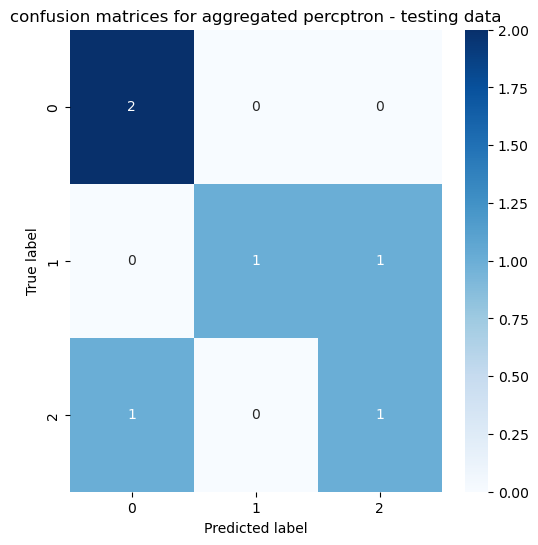

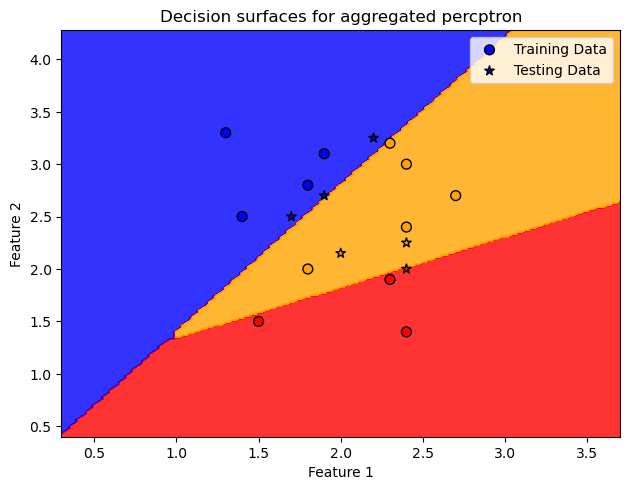

In [21]:
#print the accurcy for aggregated percptron
per_acc_train= accuracy_score(y_train, per_train_all)
per_acc_test= accuracy_score(y_test, per_test_all)
print("aggregated SVM accurcy for training : ",per_acc_train*100,"%")
print("aggregated SVM accurcy for testing : ",per_acc_test*100,"%")

#Confusion matrices for aggregated percptron - training data
p_cm_train=confusion_matrix(y_train, per_train_all)
plot_confusion_matrix(p_cm_train, "confusion matrices for aggregated percptron - training data")

#Confusion matrices for aggregated percptron - testing data
p_cm_test=confusion_matrix(y_test, per_test_all)
plot_confusion_matrix(p_cm_test, "confusion matrices for aggregated percptron - testing data")

#Decision surfaces for aggregated percptron
per_all=[per0,per1,per2]
plot_decision_surface_ag(per_all, x_train, per_train_all, x_test, per_test_all,"Decision surfaces for aggregated percptron")

In [22]:
#Refine the default SVM by selecting the appropriate parameter

#Define SVM model with default hyperparameters
svm_svm = SVC(kernel='rbf')

#Define grid of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}

#Use GridSearchCV to find best hyperparameters
svm_cv = GridSearchCV(svm_svm, param_grid, cv=3)
svm_cv.fit(x_train, y_train)

#Get best hyperparameters and performance on test set
best_params = svm_cv.best_params_
r_pred_train = svm_cv.predict(x_train)
r_pred_test = svm_cv.predict(x_test)
raccuracy_train = accuracy_score(y_train, r_pred_train)
raccuracy_test = accuracy_score(y_test, r_pred_test)

print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 1, 'gamma': 1}


Accuracy on train set for refined SVM: 100.0 %
Accuracy on test set for refined SVM: 100.0 %


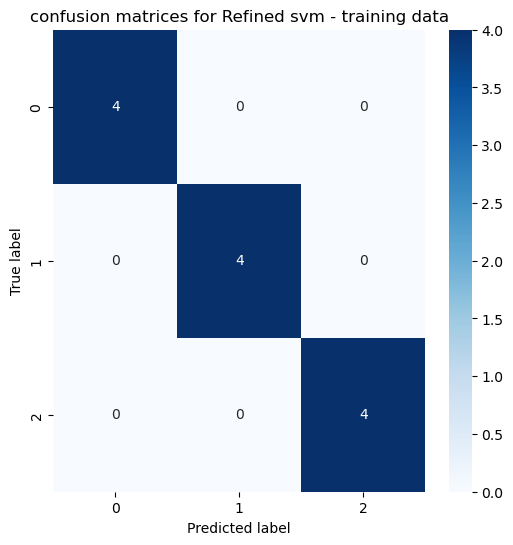

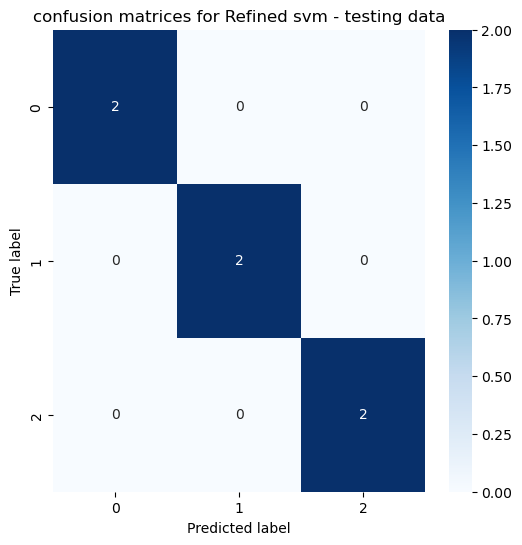

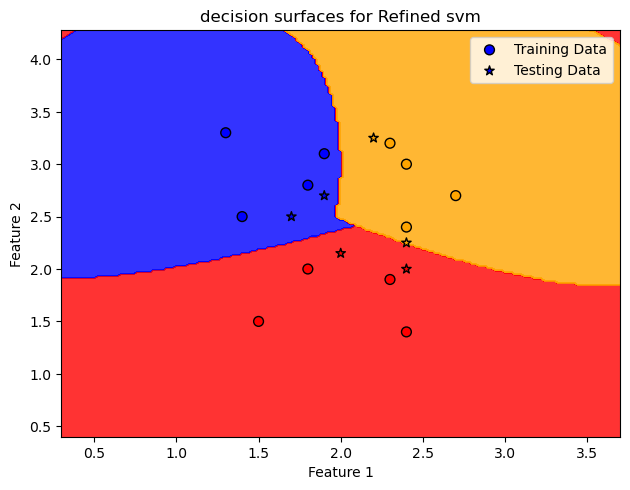

In [23]:
#print the accurcy for refined SVM 
print("Accuracy on train set for refined SVM:", raccuracy_train*100,"%")
print("Accuracy on test set for refined SVM:", raccuracy_test*100,"%")

#Confusion matrices for Refined SVM - training data
r_cm_train=confusion_matrix(y_train, r_pred_train)
plot_confusion_matrix(r_cm_train, "confusion matrices for Refined svm - training data")

#Confusion matrices for Refined SVM - testing data
r_cm_test=confusion_matrix(y_test, r_pred_test)
plot_confusion_matrix(r_cm_test, "confusion matrices for Refined svm - testing data")

#Decision surfaces for Refined SVM
plot_decision_surface(svm_cv, x_train, r_pred_train, x_test, r_pred_test,"decision surfaces for Refined svm")

# Problem 2

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from random import shuffle
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [25]:
# Load the dataset from a CSV file
cars_data = pd.read_csv('car_evaluation.csv',header=None)

# Define the column names
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
cars_data.columns = column_names

cars_data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
# Print the unique values in the column
for column in cars_data.columns:
    print("Unique values in column '{}': {}".format(column, cars_data[column].unique()))

Unique values in column 'buying': ['vhigh' 'high' 'med' 'low']
Unique values in column 'maint': ['vhigh' 'high' 'med' 'low']
Unique values in column 'doors': ['2' '3' '4' '5more']
Unique values in column 'persons': ['2' '4' 'more']
Unique values in column 'lug_boot': ['small' 'med' 'big']
Unique values in column 'safety': ['low' 'med' 'high']
Unique values in column 'target': ['unacc' 'acc' 'vgood' 'good']


In [27]:
#create x,y
x=cars_data.drop('target', axis=1)
y=cars_data['target']

# Split the dataset into a training set with 1000 samples, a validation set with 300 samples, and a testing set with 428 samples
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=428, random_state=42,shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=1000, random_state=42)

In [28]:
#change string values into numeric by Encoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
y_val=le.fit_transform(y_val)

oe=OrdinalEncoder()
x_train=oe.fit_transform(x_train)
x_test=oe.transform(x_test)
x_val=oe.fit_transform(x_val)

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

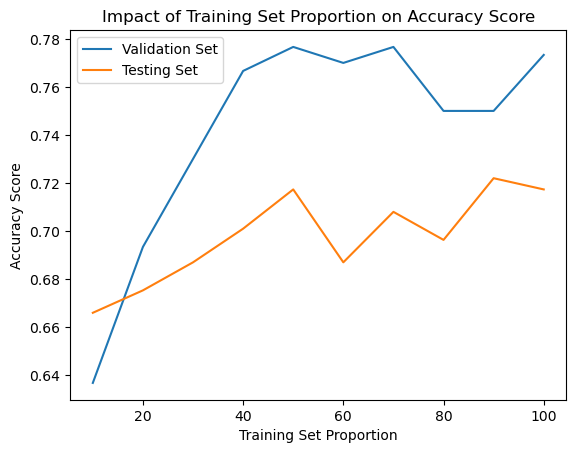

In [29]:
# Define the range of training set proportions
training_proportions = np.linspace(0.1, 1.0, 10)

# Initialize lists to store accuracy scores
validation_scores = []
testing_scores = []

# Iterate over the training set proportions
for proportion in training_proportions:
    # Calculate the number of training samples based on the proportion
    num_samples = int(len(x_train) * proportion)
    
    # Create subsets of the training data
    X_train_subset = x_train[:num_samples]
    Y_train_subset = y_train[:num_samples]
    
    # Create a KNN classifier with K=2
    knn = KNeighborsClassifier(n_neighbors=2)
    
    # Train the classifier
    knn.fit(X_train_subset, Y_train_subset)
    
    # Predict labels for the validation set and calculate accuracy
    val_predictions = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    validation_scores.append(val_accuracy)
    
    # Predict labels for the testing set and calculate accuracy
    test_predictions = knn.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    testing_scores.append(test_accuracy)

# Plot the accuracy scores on validation and testing sets
plt.plot(training_proportions*100, validation_scores, label='Validation Set')
plt.plot(training_proportions*100, testing_scores, label='Testing Set')

# Set the plot labels and title
plt.xlabel('Training Set Proportion')
plt.ylabel('Accuracy Score')
plt.title('Impact of Training Set Proportion on Accuracy Score')
plt.legend()

# Show the plot
plt.show()

C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

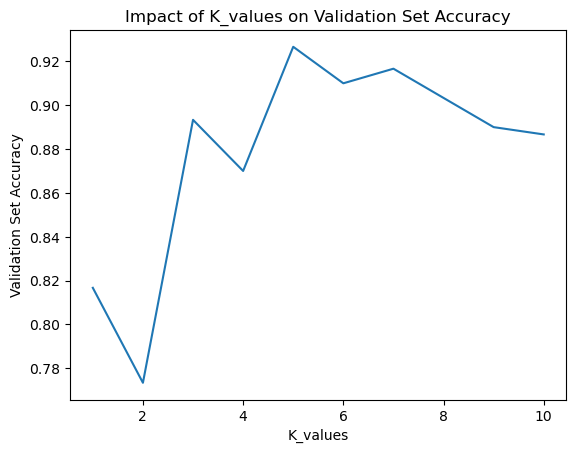

In [30]:
# Define a range of K values to try
k_values = range(1, 11)

# Train KNN classifiers with different K values and evaluate on the validation set
val_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    val_score =accuracy_score(y_val,y_pred)

    val_scores.append(val_score)

# Plot the validation set accuracy scores as a function of K
plt.plot(k_values, val_scores)
plt.xlabel('K_values')
plt.ylabel('Validation Set Accuracy')
plt.title('Impact of K_values on Validation Set Accuracy')
plt.show()

In [31]:
#Sandy
#Phoebe
#Muhammad